# Mall_Customer's Segmentation

### Content
#### Mall customers dataset:
##### Genre:
This column represents the gender of the mall customers. It can have two possible values, typically 'Male' or 'Female', indicating the gender of the individual.
##### Age:
The 'Age' column contains the age of each mall customer. It is a numerical value that represents the customer's age in years. The age of the customers is used to segment and analyze different age groups for targeted marketing and understanding customer preferences based on age.
###### Annual Income (k):
The 'Annual Income' column represents the annual income of each mall customer in thousands of dollars (k$). This is a numerical feature that reflects the customer's earning capacity or purchasing power.
##### Spending Score (1-100):
The 'Spending Score' column is a numerical attribute that quantifies the spending behavior of each mall customer on a scale from 1 to 100. The score is calculated based on various factors, such as the amount spent, frequency of visits, and types of purchases made. Higher scores indicate higher spending tendencies and vice versa.

The combination of these columns in the dataset allows mall owners and marketers to perform various analyses to understand
customer behavior and preferences. For instance, they can identify high-income individuals with high spending scores, specific age groups with certain spending patterns, or explore the relationship between age, income, and spending behavior to develop targeted marketing strategies. Additionally, this dataset can be used for customer segmentation, which can help tailor marketing campaigns and improve overall customer satisfaction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers (Major).csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [7]:
print("Is there any duplicate value",df.duplicated().any())

Is there any duplicate value False


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
x=df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### K-means Clustering :Divides data into K clusters,
where K is specified by the user. Each data point belongs to the cluster with the nearset mean.

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): # i : no of clustering
 data=KMeans(n_clusters=i,init="k-means++",random_state=42)
 data.fit(x)
 wcss.append(data.inertia_) #to claculate varience and stored it in
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25036.417604033984,
 21916.794789843727,
 20072.07093940401]

# Visualizing Data Clusters
Elbow Method: is a technique that we use to determine the number of 
centroids(k) to use in a k-means clustering algorithm.For every value 
of k, we calculate the within-cluster sum of squares (WCSS) value.Now
For determining the best number of clusters(k) we plot a graph of k 
versus their WCSS value. We choose that value of k from where the 
graph starts to look like a straight line.

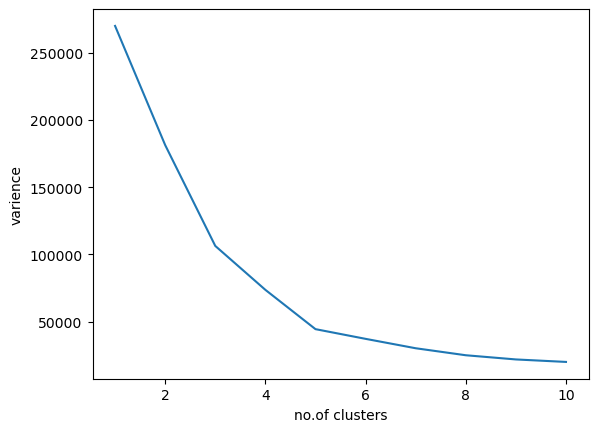

In [12]:
plt.plot(range(1,11),wcss)
plt.xlabel('no.of clusters')
plt.ylabel('varience')
plt.show()

- k-means clustering algorithm to perform cluster analysis on a dataset represented by the variable data. Here's a step-by-step description of the code:
- X = data.iloc[:, :].values: This line of code extracts the values from the entire DataFrame data and assigns them to the variable X. Thevariable X now represents the dataset that will be used for clustering. The iloc function is used to access the data based on integerlocation, and [:, :] selects all rows and all columns of the DataFrame.
- kmean = KMeans(n_clusters=6): In this line, the k-means clustering algorithm is initialized with the number of clusters set to 6. The kmeans algorithm aims to partition the data into k clusters, and n_clusters=6 specifies that we want to create 6 clusters. The variable kmean is now an instance of the KMeans class, configured to perform clustering with 6 cluster- s.
- y_means = kmean.fit_predict(X): This line performs the actual clustering process. The fit_predict method of the KMeans class is used to fit the model to the data (X) and predict the cluster labels for each data point. The resulting cluster labels are stored in the variable y_means. Each element of y_means represents the cluster assignment of the corresponding data point i- n X.

- In summary, the provided code uses k-means clustering to group the data points in the data DataFrame into 6 distinct clusters based on their features. The cluster assignments for each data point are stored in the y_means variable. After running this code, you can use the cluster assignments to analyze and interpret the characteristics of each cluster and gain insights from the data's natural grouping patterns.

In [13]:
data1=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_data=data1.fit_predict(x)
y_data

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [14]:
x['cluster']=y_data
x

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [15]:
x1=x.iloc[:,:-1].values
y1=x.iloc[:,-1].values
x1
y1

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

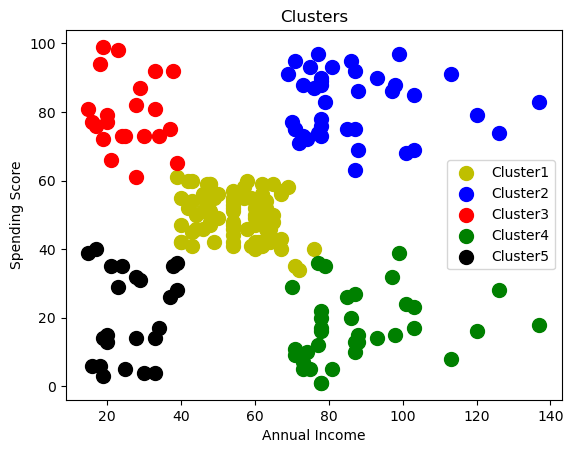

In [16]:
x=np.array(x)
plt.scatter(x[y_data==0,0], 
x[y_data==0,1],s=100,c='y',label='Cluster1')
plt.scatter(x[y_data==1,0], 
x[y_data==1,1],s=100,c='b',label='Cluster2')
plt.scatter(x[y_data==2,0], 
x[y_data==2,1],s=100,c='r',label='Cluster3')
plt.scatter(x[y_data==3,0], 
x[y_data==3,1],s=100,c='g',label='Cluster4')
plt.scatter(x[y_data==4,0], 
x[y_data==4,1],s=100,c='k',label='Cluster5')
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)
x_train

array([[ 87,  63],
       [ 60,  50],
       [ 30,  73],
       [ 20,  15],
       [ 33,  81],
       [ 67,  57],
       [ 39,  36],
       [103,  85],
       [ 59,  55],
       [ 73,   7],
       [ 42,  60],
       [ 71,  95],
       [ 81,   5],
       [ 38,  92],
       [ 67,  43],
       [ 64,  46],
       [ 28,  32],
       [ 74,  72],
       [ 62,  41],
       [ 63,  54],
       [ 16,   6],
       [ 54,  48],
       [ 40,  55],
       [101,  68],
       [103,  69],
       [ 54,  46],
       [ 79,  83],
       [ 34,  17],
       [103,  23],
       [ 46,  55],
       [ 25,   5],
       [ 75,  93],
       [ 62,  48],
       [ 33,  92],
       [ 19,  99],
       [120,  16],
       [ 78,  73],
       [ 18,   6],
       [ 28,  61],
       [ 67,  56],
       [ 17,  40],
       [ 33,   4],
       [ 76,  40],
       [ 77,  97],
       [ 63,  48],
       [ 77,  12],
       [ 19,  14],
       [ 47,  52],
       [ 64,  42],
       [ 77,  36],
       [ 86,  20],
       [ 15,  39],
       [137,

In [18]:
y_test

array([0, 2, 4, 3, 3, 0, 0, 3, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 3, 4,
       3, 0, 0, 0, 0, 0, 1, 0, 2, 4, 0, 0, 3, 0, 1, 1, 3, 0, 0, 1, 4, 4,
       0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 3, 0, 3, 0])

### Normalization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

### Model creation by using KNN, Decision tree, Random forest Algorithms

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
lst=[knn,dec,rf]

### Performance Evaluation

In [21]:
from sklearn.metrics import classification_report,accuracy_score
for i in lst:
 print(i)
 i.fit(x_train,y_train)
 y_pred=i .predict(x_test)
 y_pred
 print("Accuracy Score",accuracy_score(y_test,y_pred))
 print(classification_report(y_test,y_pred))

KNeighborsClassifier()
Accuracy Score 0.9666666666666667
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      1.00      1.00         9
           2       1.00      0.83      0.91         6
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         5

    accuracy                           0.97        60
   macro avg       0.99      0.95      0.97        60
weighted avg       0.97      0.97      0.97        60

DecisionTreeClassifier()
Accuracy Score 0.9333333333333333
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.90      1.00      0.95         9
           2       1.00      0.83      0.91         6
           3       0.87      1.00      0.93        13
           4       1.00      1.00      1.00         5

    accuracy                           0.93        60
   macro avg   

### Conclusion:
On the Mall Customers dataset, we selected only two features Annual Income (k$) and Spending Score (1-100) for two reasons:
- To visualize the clusters in the data.
- These two features are the most important features among the 4 input features.

After applying the K-Means algorithm to the Mall Customers dataset we get the following observations:
- Cluster 0(red region) contains the customers who have moderate Annual Income and moderate Spending Score.
- Cluster 1(green region) contains the customers who have high Annual Income and high Spending Score.
- Cluster 2(blue region) contains the customers who have high Annual Income and low Spending Score.
- Cluster 3(yellow region) contains the customers who have low Annual Income and low Spending Score.
- Cluster 4(magenta region) contains the customers who have low Annual Income and high Spending Score.

